#<b>What is Conditional Random Field?</b>

“An undirected graphical model to find pattern recognition in structured prediction ”



1.   CRF is an undirected discriminative probabilistic graphical model
2.   No natural condition between the nodes
3.   Conditional probabilities are replaced by affinity or factor (when the neighbor node is known)
4.  It is cyclic in nature
Always depends on the  immediate neighbors


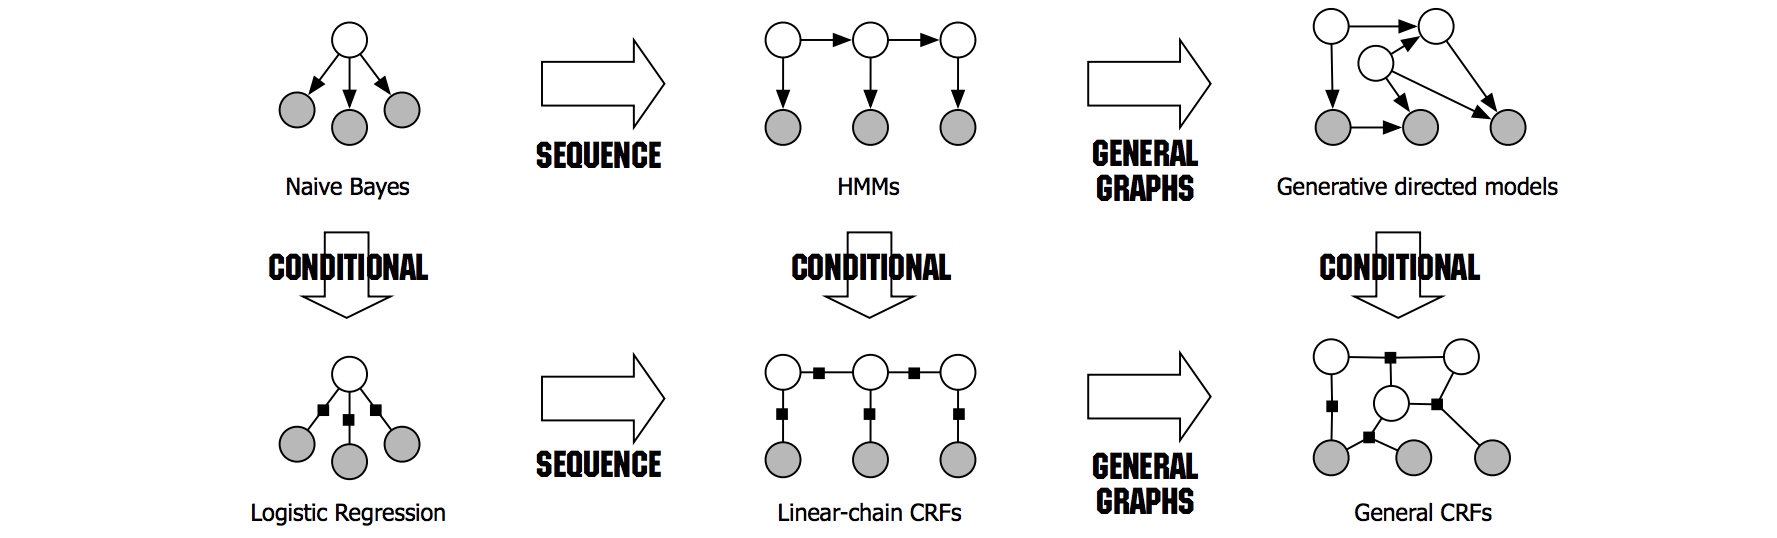







#<b> NAME ENTITY RECOGNITION USING CONDITIONAL RANDOM FIELD
Name Entity extraction, also known as entity name extraction or named entity recognition, is an information extraction technique that refers to the process of identifying and classifying key elements from text into pre-defined categories


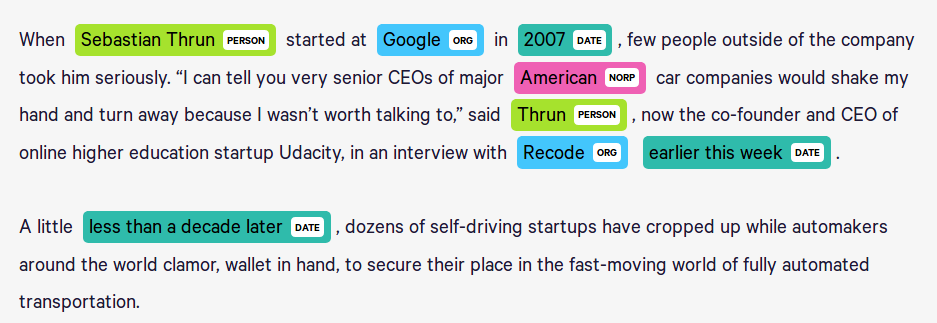

#<b> Importing Dataset

In [1]:
!wget https://www.dropbox.com/s/qtbih1i6x2hrejr/entity-annotated-corpus.zip

--2021-05-08 16:38:06--  https://www.dropbox.com/s/qtbih1i6x2hrejr/entity-annotated-corpus.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qtbih1i6x2hrejr/entity-annotated-corpus.zip [following]
--2021-05-08 16:38:06--  https://www.dropbox.com/s/raw/qtbih1i6x2hrejr/entity-annotated-corpus.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc59b73e480b2594bbd75378e6f6.dl.dropboxusercontent.com/cd/0/inline/BOHaF7XmpmCf3WTmIX7q3jd5u9MoyCXfkNvSpPjoHsfbl3rdib2_9zLOOZ4sw_ltNEPswSEyxizjh_T42FPjVlasu6cD6W4UjzHTkbplKSm-ff2EE4igMkhb1h36fIwCuOnSUONUMDyD2MlZPBh6M01C/file# [following]
--2021-05-08 16:38:06--  https://uc59b73e480b2594bbd75378e6f6.dl.dropboxusercontent.com/cd/0/inline/BOHaF7XmpmCf3WTmIX7q3jd5u9MoyCXfkNvSpPjoHs

#<b> Installing and Importing Libraries

In [2]:
! pip install eli5

     |████████████████████████████████| 112kB 10.9MB/s 


In [3]:
! pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 11.1MB/s 


#<b> Unzip the dataset

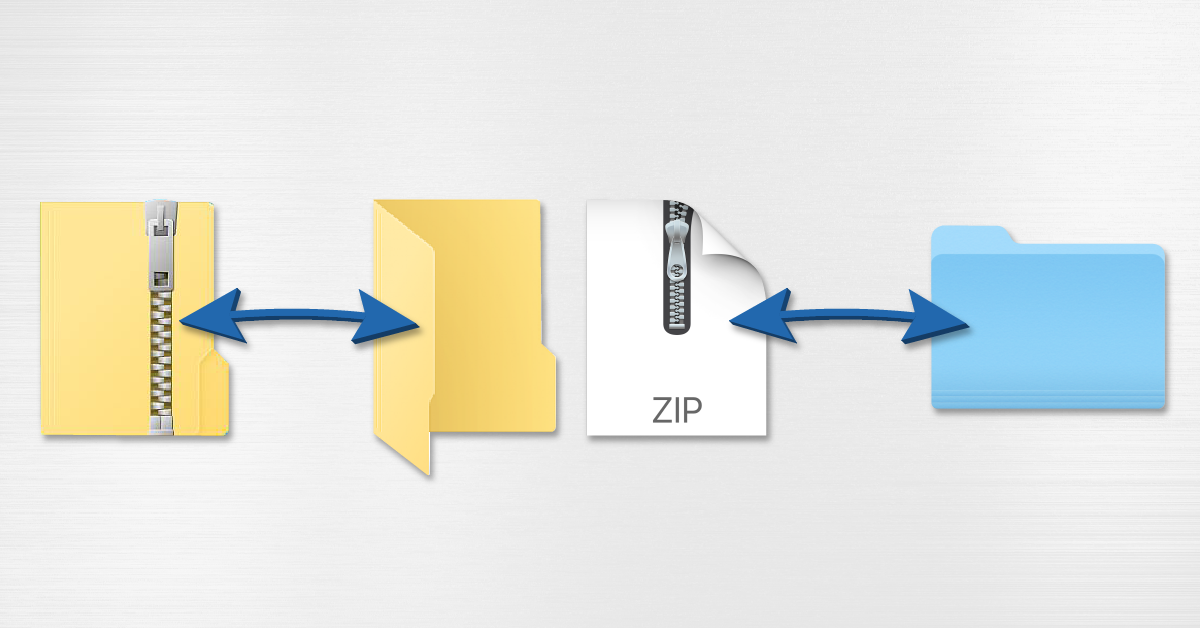

In [4]:
!unzip entity-annotated-corpus.zip

Archive:  entity-annotated-corpus.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


In [5]:
import pandas as pds
import eli5 as el
from sklearn_crfsuite import CRF as crf
from sklearn.model_selection import cross_val_predict as cvp
from sklearn_crfsuite.metrics import flat_classification_report as fcr


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


#Load the dataset. 
<b>Origin of the dataset: </b>The dataset has been downloaded from Kaggle <br> https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus
<br>
<b> Dataset descriptions:</b>
This dataset has text with tags that represent grography, persons, organisations etc. 

Let's consider only 10000 rows from this dataset as this is a huge dataset and for computational considerations

In [6]:

text_df = pds.read_csv("ner_dataset.csv", encoding="latin1")
text_df=text_df.head(10000)

In [7]:
text_df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


#<b> Data pre-processing step
Fill the data with NA wherever applicable 


In [8]:
text_df = text_df.fillna(method="ffill")

In [9]:
text_df.head()


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


# <b>Create the list of words with the column 'Word' from the dataset


In [10]:
text_df["Word"].values

array(['Thousands', 'of', 'demonstrators', ..., 'tribunal', 'in', 'The'],
      dtype=object)

<b> Using set function making ditinct word list

In [11]:
set(text_df["Word"].values)

{'fought',
 'allegations',
 'loyal',
 'after',
 'suspect',
 'nightclub',
 'disgraced',
 'Defense',
 'that',
 'remnants',
 'Egypt',
 'captured',
 'meant',
 'denounced',
 'reached',
 'Huygens',
 'Non-Proliferation',
 'downed',
 'Iraqi',
 'previous',
 'refused',
 'fire',
 'relatively',
 'pursuing',
 'refer',
 'Indonesian',
 'negotiations',
 'when',
 'treated',
 'Manuel',
 'strain',
 'Mugabe',
 'Union',
 'Party',
 'Laden',
 'ceremonial',
 'rape',
 'at',
 'state',
 'Secretary',
 'refugees',
 'ago',
 'clear',
 'conversion',
 'year',
 'cap',
 'produced',
 'exiled',
 'pardon',
 'surveillance',
 'Sperling',
 'killing',
 'During',
 'militants',
 'guise',
 'following',
 'Department',
 'birds',
 'Kyrgyzstan',
 'manufacturer',
 'according',
 'led',
 'only',
 'deadly',
 'diabetes',
 'Fatah',
 'Saudi',
 'finalize',
 'nearly',
 'establishes',
 'Merck',
 'touched',
 'teacher',
 'occurred',
 'soldier',
 'questioning',
 'staff',
 'force',
 'dollars',
 'abating',
 'cases',
 'Sharon',
 'minus',
 'strength'

In [12]:
list_of_words = list(set(text_df["Word"].values))

list_of_words

['fought',
 'allegations',
 'loyal',
 'after',
 'suspect',
 'nightclub',
 'disgraced',
 'Defense',
 'that',
 'remnants',
 'Egypt',
 'captured',
 'meant',
 'denounced',
 'reached',
 'Huygens',
 'Non-Proliferation',
 'downed',
 'Iraqi',
 'previous',
 'refused',
 'fire',
 'relatively',
 'pursuing',
 'refer',
 'Indonesian',
 'negotiations',
 'when',
 'treated',
 'Manuel',
 'strain',
 'Mugabe',
 'Union',
 'Party',
 'Laden',
 'ceremonial',
 'rape',
 'at',
 'state',
 'Secretary',
 'refugees',
 'ago',
 'clear',
 'conversion',
 'year',
 'cap',
 'produced',
 'exiled',
 'pardon',
 'surveillance',
 'Sperling',
 'killing',
 'During',
 'militants',
 'guise',
 'following',
 'Department',
 'birds',
 'Kyrgyzstan',
 'manufacturer',
 'according',
 'led',
 'only',
 'deadly',
 'diabetes',
 'Fatah',
 'Saudi',
 'finalize',
 'nearly',
 'establishes',
 'Merck',
 'touched',
 'teacher',
 'occurred',
 'soldier',
 'questioning',
 'staff',
 'force',
 'dollars',
 'abating',
 'cases',
 'Sharon',
 'minus',
 'strength'

#<b> Count the number of distinct words

In [13]:
num_words = len(list_of_words)
print(num_words)

2746


#**This class is defined to get sentences with POS and tags**

In [15]:
class get_tokenised_text(object):
    
    def __init__(dummy, df):
        dummy.index = 1
        dummy.df = df
        dummy.nulls = False
        # Below function is used to concatenate or aggregare word, pos, tag in same tuple. For eg.: ('pope','NN','O')
        concat_function = lambda text: [(word, pos, tag) for word, pos, tag in zip(text["Word"].values.tolist(),
                                                           text["POS"].values.tolist(),
                                                           text["Tag"].values.tolist())]
        # Then group the sentence with the concat function written above just to separate sentences
        dummy.grouped_sentence = dummy.df.groupby("Sentence #").apply(concat_function)
        dummy.full_text = [text for text in dummy.grouped_sentence] 
    
    

#<b>The below function returns the whole text with POS and tags in a list format


In [16]:
    def get_text(dummy):
        try:
            text = dummy.df[dummy.df["Sentence #"] == "Sentence: {}".format(dummy.index)]
            dummy.index += 1
            return text["Word"].values.tolist(), text["POS"].values.tolist(), text["Tag"].values.tolist()    
        except:
            dummy.nulls = True
            return None, None, None

In [17]:
text_df_interim = get_tokenised_text(text_df)
print(text_df_interim)

#<b>Converted Text to tokenized text

In [18]:
tokenised_text = text_df_interim.full_text
print(tokenised_text)

[[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')], [('Iranian', 'JJ', 'B-gpe'), ('officials', 'NNS', 'O'), ('say', 'VBP', 'O'), ('they', 'PRP', 'O'), ('expect', 'VBP', 'O'), ('to', 'TO', 'O'), ('get', 'VB', 'O'), ('access', 'NN', 'O'), ('to', 'TO', 'O'), ('sealed', 'JJ', 'O'), ('sensitive', 'JJ', 'O'), ('parts', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('plant', 'NN', 'O'), ('Wednesday', 'NNP', 'B-tim'), (',', ',', 'O'), ('after', 'IN', 'O'), ('an', 'DT', 'O'), ('IAEA', 'NNP', 'B-org'

#<b> Function to convert text into features. </b>
<br>
Features like , , or 

1.   word parts
2.   Whether it is title
3.   Digit
4.   Upper case or a lower case 

We convert them into sklearn-crfsuite format so that it becomes easy for the package to read the data 
 <br>

<b>Each sentence is converted to a list of dicts

In [19]:

def text2features(text, index):
    word = text[index][0]
    pos_tag = text[index][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'pos_tag': pos_tag,
        'pos_tag[:2]': pos_tag[:2],
    }
    if index > 0:
        word_next = text[index-1][0]
        pos_tag_next = text[index-1][1]
        features.update({
            '-1:word.lower()': word_next.lower(),
            '-1:word.istitle()': word_next.istitle(),
            '-1:word.isupper()': word_next.isupper(),
            '-1:pos_tag': pos_tag_next,
            '-1:pos_tag[:2]': pos_tag_next[:2],
        })
    else:
        features['BOS'] = True

    if index < len(text)-1:
        word_next = text[index+1][0]
        pos_tag_next = text[index+1][1]
        features.update({
            '+1:word.lower()': word_next.lower(),
            '+1:word.istitle()': word_next.istitle(),
            '+1:word.isupper()': word_next.isupper(),
            '+1:pos_tag': pos_tag_next,
            '+1:pos_tag[:2]': pos_tag_next[:2],
        })
    else:
        features['EOS'] = True

    return features




In [20]:
def text_to_features_all(text):
    return [text2features(text, index) for index in range(len(text))]



In [21]:
def text_to_labels(text):
    return [label for token, postag, label in text]


#<b>

#<b>1.   X will contain all the features data like POS, upper or lower or digit etc. 
#<b>2.  Y is the output variable i.e. the entity




In [22]:
X = [text_to_features_all(text) for text in tokenised_text]
X

Output hidden; open in https://colab.research.google.com to view.

In [23]:
y = [text_to_labels(text) for text in tokenised_text]
y

[['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-tim',
  'O',
  'O',
  'O',
  'B-org',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'B-tim',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-org',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'I-geo',
  'O'],
 ['O', 'B-gpe', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'B-org', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-tim',
  'O'],
 ['O',
  'B-tim',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

#<b> Building CRF model

In [28]:
# Syntax to use the CRF model
# limited memory BFGS (Broyden-Fletcher-GOldFarb-Shanno)--> optimiztion 
# gradient descent method -----> optimization algorithm 
crf_model = crf(algorithm='lbfgs',
          c1=0.1,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)

#<b>Prediction

In [29]:
# Predict the model and check for accuracy and other metrics
prediction = cvp(estimator=crf_model, X=X, y=y, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# <b>Print the output and check for the metrics. How the classification has been done using CRF


In [ ]:
classification_analysis = fcr(y_pred=prediction, y_true=y)
print(classification_analysis)

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        28
       B-eve       0.00      0.00      0.00        10
       B-geo       0.70      0.76      0.73       244
       B-gpe       0.72      0.76      0.74       303
       B-nat       1.00      0.20      0.33         5
       B-org       0.66      0.63      0.64       176
       B-per       0.78      0.82      0.80       160
       B-tim       0.98      0.90      0.94       149
       I-art       0.00      0.00      0.00        20
       I-eve       0.00      0.00      0.00        10
       I-geo       0.73      0.35      0.48        31
       I-gpe       0.73      0.40      0.52        20
       I-nat       0.00      0.00      0.00         2
       I-org       0.66      0.74      0.69       140
       I-per       0.84      0.96      0.90       206
       I-tim       0.90      0.69      0.78        13
           O       0.99      1.00      1.00      8483

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#<b>Let's check what are the most frequently occured transitions and rarely occured transitions from the generated model


In [27]:
from collections import Counter
def transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))
print("Most occured transitions:")
transitions(Counter(crf_model.transition_features_).most_common(20))
print("\nMost rearely occuring transitions:")
transitions(Counter(crf_model.transition_features_).most_common()[-20:])

Most occured transitions:

Most rearely occuring transitions:


In [ ]:
crf_model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=False,
    averaging=None, c=None, c1=0.1, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

#<b> Weights of the model

In [ ]:
# Let's now inspect model weights

el.show_weights(crf_model, top=30)

# The output shows that B-art is followed by I-article, B-eve is followed by I-eve etc. which is logical.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


From \ To,O,B-art,I-art,B-eve,I-eve,B-geo,I-geo,B-gpe,I-gpe,B-nat,I-nat,B-org,I-org,B-per,I-per,B-tim,I-tim
O,3.764,1.234,0.0,1.174,0.0,1.542,0.0,1.985,0.0,0.59,0.0,1.988,0.0,0.767,0.0,2.039,0.0
B-art,-0.039,0.0,4.217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I-art,-0.406,0.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-eve,-0.538,0.0,0.0,0.0,3.978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I-eve,0.0,0.0,0.0,0.0,1.849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-geo,0.377,0.0,0.0,0.0,0.0,0.0,4.221,1.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.369,0.0
I-geo,-0.114,0.0,0.0,0.0,0.0,0.0,2.655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-gpe,0.593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.866,0.0,0.0,1.122,0.0,1.779,0.0,0.0,0.0
I-gpe,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-nat,-0.419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.683,0.0,0.0,0.0,0.0,0.0,0.0




#<b>1.   Let's do some regularization. c1 is the l1 regularization and c2 is the l2 regularization 
#<b>2.   We can increase the c1 parameter to enforce sparsity in the context 



In [ ]:


crf_model_regularized = crf(algorithm='lbfgs',
          c1=10,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)

#<b>Prediction using CRF after regularization 

In [ ]:
prediction = cvp(estimator=crf_model_regularized, X=X, y=y, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
classification_analysis_reg = fcr(y_pred=prediction, y_true=y)
print(classification_analysis_reg)

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        28
       B-eve       0.00      0.00      0.00        10
       B-geo       0.57      0.70      0.63       244
       B-gpe       0.64      0.67      0.66       303
       B-nat       0.00      0.00      0.00         5
       B-org       0.55      0.43      0.48       176
       B-per       0.63      0.74      0.68       160
       B-tim       1.00      0.64      0.78       149
       I-art       0.00      0.00      0.00        20
       I-eve       0.00      0.00      0.00        10
       I-geo       1.00      0.16      0.28        31
       I-gpe       0.00      0.00      0.00        20
       I-nat       0.00      0.00      0.00         2
       I-org       0.64      0.50      0.56       140
       I-per       0.69      0.96      0.81       206
       I-tim       0.00      0.00      0.00        13
           O       0.99      1.00      0.99      8483

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
crf_model_regularized.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=False,
    averaging=None, c=None, c1=10, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

In [ ]:
el.show_weights(crf_model_regularized, top=30)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


From \ To,O,B-art,I-art,B-eve,I-eve,B-geo,I-geo,B-gpe,I-gpe,B-nat,I-nat,B-org,I-org,B-per,I-per,B-tim,I-tim
O,1.055,0.697,0.0,0.0,0.0,1.322,0.0,0.67,0.0,0.0,0.0,0.688,0.0,0.0,0.0,1.582,0.0
B-art,0.0,0.0,1.286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I-art,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-eve,-0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I-eve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-geo,0.0,0.0,0.0,0.0,0.0,0.0,2.589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I-geo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-gpe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I-gpe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-nat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
